<a href="https://colab.research.google.com/github/sulaimanbehzad/Classifying-Images/blob/main/Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifiers
The purpose of this project is to train two classifiers:
1. Captions classifier
2. Image classifier

In [148]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

import imageio
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import utils
from keras.preprocessing import image
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import ResNet50
from PIL import Image as pil_image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras import backend as K
from keras.utils import np_utils
from keras import regularizers

VGG16

## Part 2: Image Classifier

We will use VGG16 model to obtain a vector representation of the model

setting-up the parameters for image loader

In [71]:
img_width, img_height = 224, 224
path_train_images = r'/content/drive/MyDrive/dataset/train/images'   
path_test_images =  r'/content/drive/MyDrive/dataset/test/images'
path_dataset = r'/content/drive/MyDrive/dataset'
nb_train_samples = 532
nb_validation_samples = 380
epochs = 50
batch_size = 32


In [72]:
# if K.image_data_format() == 'channels_first':
#     input_shape = (3, img_width, img_height)
# else:
#     input_shape = (img_width, img_height, 3)


In [73]:
im_generator = ImageDataGenerator()

In [74]:
train_df = im_generator.flow_from_directory(
  path_train_images,
  # validation_split=0.2,
  class_mode="categorical",
  shuffle=False,
  # seed=123,
  target_size=(img_height, img_width),
  batch_size=batch_size,
  )



Found 532 images belonging to 19 classes.


In [75]:
val_df = im_generator.flow_from_directory(
  path_test_images,
  # validation_split=0.2,
  class_mode="categorical",
  shuffle=False,
  # seed=123,
  target_size=(img_height, img_width),
  batch_size=batch_size,
  )

Found 380 images belonging to 19 classes.


In [76]:
tags = train_df.labels
print(f'tags are: {tags} \n and length of tags is: {len(tags)}')

tags are: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 1

In [77]:
model_vgg16_conv = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
print(model_vgg16_conv.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [78]:
model_vgg16_conv.trainable = False
print(model_vgg16_conv.summary())
# model_vgg16_conv = Model(inputs=model_vgg16_conv.input, outputs=model_vgg16_conv.get_layer('fc2').output)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [149]:
model_resnet = EfficientNetB0(weights='imagenet', include_top=False, 
                              input_shape=(img_width, img_height, 3))
model_resnet.trainable = False
model_resnet.summary()

16711680/16705208 [==============================] - 0s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_2 (Rescaling)         (None, 224, 224, 3)  0           input_9[0][0]                    
__________________________________________________________________________________________________
normalization_2 (Normalization) (None, 224, 224, 3)  7           rescaling_2[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization_2[0][0]            
____________________

In [150]:
X_train = model_resnet.predict(train_df, batch_size=batch_size)

In [151]:
X_test = model_resnet.predict(val_df, batch_size=batch_size)

In [152]:
# X_train.to_csv(r'/content/drive/MyDrive/dataset/train/X_train.csv', index=False)
# X_test.to_csv(r'/content/drive/MyDrive/dataset/test/X_test.csv', index=False )

In [ ]:
# X_train = pd.read_csv('/content/drive/MyDrive/dataset/train/X_train.csv')
# X_test = pd.read_csv('/content/drive/MyDrive/dataset/test/X_test.csv')
# X_test

,vectors,tags
0,[0. 2.4787788 2.431244 ... 0. 3...,aeroplane
1,[0. 0. 5.791051 ... 0. 0. ...,aeroplane
2,[0. 0.49636486 3.15727 ... 0.447276...,aeroplane
3,[0. 0. 6.534189 ... 0. 0. ...,aeroplane
4,[0. 0. 5.223525 ... 0. 0. ...,aeroplane
...,...,...
375,[3.6616554 0. 0. ... 0. 0...,tvmonitor
376,[2.498087 0. 0. ... 0. 0. ...,tvmonitor
377,[1.6543726 0. 0. ... 0. 0...,tvmonitor
378,[0. 0. 0. ... 0. 0...,tvmonitor


In [ ]:
# plt.figure(figsize=(15, 10))
# for im, lbl in train_df.take(1):
#   for i in range(4):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(im[i].numpy().astype("uint8"))
#     plt.title(tags[lbl[i]])
#     plt.axis("off")


AttributeError: ignored

<Figure size 1080x720 with 0 Axes>

In [ ]:
# AUTOTUNE = tf.data.AUTOTUNE
# train_df = train_df.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# validation_df = validation_df.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
# normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)


In [ ]:
# data_augmentation = keras.Sequential(
#   [
#     layers.experimental.preprocessing.RandomFlip("horizontal", 
#                                                  input_shape=(img_height, 
#                                                               img_width,
#                                                               3)),
#     layers.experimental.preprocessing.RandomRotation(0.1),
#     layers.experimental.preprocessing.RandomZoom(0.1),
#   ]
# )


In [ ]:
# normalized_df = train_df.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_df))
# first_image = image_batch[0]
# # Notice the pixels values are now in `[0,1]`.
# print(np.min(first_image), np.max(first_image))


In [10]:
y_train = utils.to_categorical(train_df.labels)
y_test = utils.to_categorical(val_df.labels)

In [11]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [175]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=1e-3, momentum=0.9, decay=1e-3 / 25)
reg_hyp = 0.01
model = Sequential([
  # data_augmentation,
  # layers.experimental.preprocessing.Rescaling(1./255),
  layers.Flatten(),
  BatchNormalization(),
  layers.Dense(512, activation='selu', kernel_regularizer=regularizers.L2(reg_hyp)),
  layers.Dropout(0.6),
  BatchNormalization(),
  layers.Dense(256, activation='selu', kernel_regularizer=regularizers.L2(reg_hyp)),
  layers.Dropout(0.5),
  BatchNormalization(),
  layers.Dense(128, activation='selu', kernel_regularizer=regularizers.L2(reg_hyp)),
  layers.Dropout(0.5),
  BatchNormalization(),
  layers.Dense(64, activation='selu', kernel_regularizer=regularizers.L2(reg_hyp)),
  layers.Dropout(0.5),
  BatchNormalization(),
  layers.Dense(19, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [176]:
history = model.fit(
  X_train,
  y_train,
  epochs=25,
  shuffle=True,
  validation_data=(X_test, y_test),
  batch_size=128 
)


Epoch 1/25
5/5 [==============================] - 9s 1s/step - loss: 19.7989 - accuracy: 0.0894 - val_loss: 21.5012 - val_accuracy: 0.3842
Epoch 2/25
5/5 [==============================] - 6s 1s/step - loss: 20.4939 - accuracy: 0.1865 - val_loss: 21.6001 - val_accuracy: 0.4237
Epoch 3/25
5/5 [==============================] - 6s 1s/step - loss: 21.3704 - accuracy: 0.2230 - val_loss: 21.4366 - val_accuracy: 0.4842
Epoch 4/25
5/5 [==============================] - 6s 1s/step - loss: 21.3209 - accuracy: 0.2912 - val_loss: 20.7595 - val_accuracy: 0.5105
Epoch 5/25
5/5 [==============================] - 6s 1s/step - loss: 20.6370 - accuracy: 0.3098 - val_loss: 19.6160 - val_accuracy: 0.5026
Epoch 6/25
5/5 [==============================] - 6s 1s/step - loss: 19.4750 - accuracy: 0.3603 - val_loss: 18.2237 - val_accuracy: 0.5211
Epoch 7/25
5/5 [==============================] - 6s 1s/step - loss: 18.1192 - accuracy: 0.3500 - val_loss: 16.7814 - val_accuracy: 0.5263
Epoch 8/25
5/5 [===========

In [166]:
history2 = model.fit(X_train,
                     y_train,
                     epochs=50,
                     shuffle=True,
                     validation_data=(X_test, y_test),
                     batch_size=128, 
                     initial_epoch=history.epoch[-1])

Epoch 25/50
5/5 [==============================] - 6s 1s/step - loss: 8.2280 - accuracy: 0.6974 - val_loss: 8.6704 - val_accuracy: 0.5974
Epoch 26/50
5/5 [==============================] - 5s 1s/step - loss: 8.1634 - accuracy: 0.7350 - val_loss: 8.6367 - val_accuracy: 0.5842
Epoch 27/50
5/5 [==============================] - 5s 1s/step - loss: 8.1530 - accuracy: 0.7124 - val_loss: 8.4780 - val_accuracy: 0.5868
Epoch 28/50
5/5 [==============================] - 5s 1s/step - loss: 7.9444 - accuracy: 0.7256 - val_loss: 8.3674 - val_accuracy: 0.5921
Epoch 29/50
5/5 [==============================] - 5s 1s/step - loss: 7.8182 - accuracy: 0.7556 - val_loss: 8.3193 - val_accuracy: 0.6026
Epoch 30/50
5/5 [==============================] - 5s 1s/step - loss: 7.7939 - accuracy: 0.7237 - val_loss: 8.2813 - val_accuracy: 0.5895
Epoch 31/50
5/5 [==============================] - 5s 1s/step - loss: 7.7350 - accuracy: 0.7462 - val_loss: 8.2658 - val_accuracy: 0.5895
Epoch 32/50
5/5 [=================

In [136]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 100352)            0         
_________________________________________________________________
dense_81 (Dense)             (None, 512)               51380736  
_________________________________________________________________
dropout_62 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_270 (Bat (None, 512)               2048      
_________________________________________________________________
dense_82 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_63 (Dropout)         (None, 256)               0         
_________________________________________________________________
batch_normalization_271 (Bat (None, 256)             

In [156]:
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
print(f'Test loss:{score[0]}')
print(f'Test accuracy:{score[1]}')

12/12 [==============================] - 1s 91ms/step - loss: 6.7272 - accuracy: 0.5947
Test loss:6.7271504402160645
Test accuracy:0.5947368144989014


ValueError: ignored

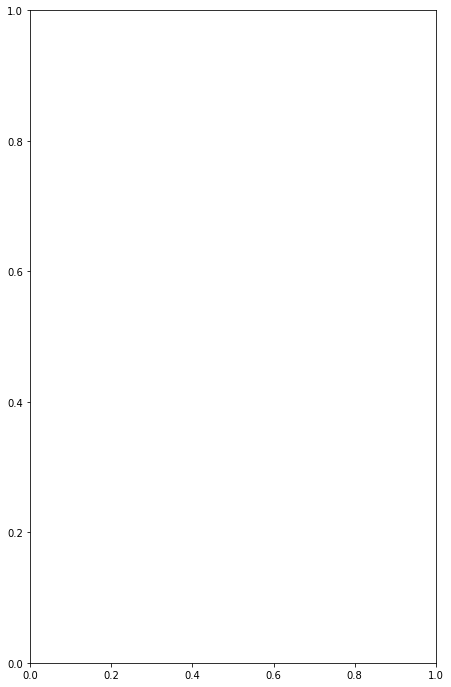

In [139]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss'] 

epochs_range = range(epochs)


plt.figure(figsize=(16, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
